In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import numpy as np
from matplotlib import font_manager, rc
from tqdm import tqdm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [4]:
path = 'c:/bg/dacon/jeju_card/'
data = pd.read_csv(path +'201901-202003.csv')
new_data = pd.read_csv(path + '202004.csv')
gc.collect()

155

In [5]:
data = pd.concat([data, new_data], axis = 0)
data

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
0,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4
1,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8
2,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6
3,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5
4,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3
5,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,2,3,7,627500,7
6,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,50s,1,4,21,3690830,21
7,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,50s,2,4,21,3573300,20
8,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,60s,1,5,19,1433500,20
9,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,60s,2,5,33,7194600,40


In [6]:
#----------------------------------------------
## <group_city_clss_time>
# 데이터를 날짜, 도시, 업종으로 groupby
# 인덱싱을 편하게 하기 위해 row를 CARD_SIDO_NM,	STD_CLSS_NM, REG_YYMM 3개의 level로 표현
group_city_clss_time = data.loc[:, ['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM', 'AMT']]\
                           .groupby(['CARD_SIDO_NM', 'STD_CLSS_NM', 'REG_YYMM'])['AMT']\
                           .sum()
group_city_clss_time = pd.DataFrame(group_city_clss_time)
gc.collect()
#group_data는 'AMT'하나만 column으로 갖는다.
#group_city_clss_time = np.log(group_city_clss_time)
print('group_city_clss_time')
display(group_city_clss_time)
#----------------------------------------------
## <group_data>
group_data = np.log(group_city_clss_time)
print('group_data')
display(group_data)
#----------------------------------------------
## <group_city_clss_time_count>
group_city_clss_time_count = data.loc[:, ['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM', 'AMT']]\
                           .groupby(['CARD_SIDO_NM', 'STD_CLSS_NM', 'REG_YYMM'])['AMT']\
                           .count()
group_city_clss_time_count = pd.DataFrame(group_city_clss_time_count)
group_city_clss_time_count.columns = ['COUNT']
print('group_city_clss_time_count')
display(group_city_clss_time_count)
#----------------------------------------------
## <group_city_clss>
data['sido_clss_rows_under'] = (data.CSTMR_CNT <= 3) * 1
group_city_clss = pd.DataFrame(data.loc[:, ['CARD_SIDO_NM', 'STD_CLSS_NM', 'sido_clss_rows_under']].\
                               groupby(['CARD_SIDO_NM', 'STD_CLSS_NM'])[['sido_clss_rows_under']].sum())
group_city_clss['total_rows'] = data.loc[:, ['CARD_SIDO_NM', 'STD_CLSS_NM', 'sido_clss_rows_under']].\
                               groupby(['CARD_SIDO_NM', 'STD_CLSS_NM'])[['sido_clss_rows_under']].count()
group_city_clss['p'] = group_city_clss.sido_clss_rows_under / group_city_clss.total_rows
group_city_clss['std_error'] = 0
print('group_city_clss')
display(group_city_clss)
gc.collect()

group_city_clss_time


AMT
CARD_SIDO_NM STD_CLSS_NM   REG_YYMM            
강원           건강보조식품 소매업    201901     148354746
                           201902     146715871
                           201903     109439025
                           201904     106548473
                           201905     148115738
                           201906      97960089
                           201907      92505731
                           201908      99023125
                           201909     205353608
                           201910     115917681
                           201911      98084641
                           201912      95232313
                           202001     185008768
                           202002      76505561
                           202003      96059012
                           202004      88823988
             골프장 운영업       201901    1229200312
                           201902    1152240972
                           201903    2760497139
                           201904    3964893280
                           201905    5493931873
                           201906    5663769821
                           201907    5032904403
                           201908    5800083088
                           201909    4158457576
                           201910    5652093233
                           201911    4017469979
                           201912    1239989001
                           202001    1241102011
                           202002     968456455
...                                         ...
충북           화장품 및 방향제 소매업 201903     729328422
                           201904     687254347
                           201905     713497408
                           201906     652652622
                           201907     599495492
                           201908     573856229
                           201909     569093721
                           201910     608502694
                           201911     580160733
                           201912     588832444
                           202001     564909717
                           202002     495012925
                           202003     428881434
                           202004     450507431
             휴양콘도 운영업      201901     198574855
                           201902     165872181
                           201903     107431443
                           201904     101930350
                           201905     178834870
                           201906     141948888
                           201907     206980154
                           201908     476196855
                           201909     106059410
                           201910     185329025
                           201911     124117555
                           201912     139568962
                           202001     222073112
                           202002      47085830
                           202003      12733490
                           202004       9328420

[10048 rows x 1 columns]

group_data


AMT
CARD_SIDO_NM STD_CLSS_NM   REG_YYMM           
강원           건강보조식품 소매업    201901    18.815117
                           201902    18.804008
                           201903    18.510878
                           201904    18.484111
                           201905    18.813505
                           201906    18.400071
                           201907    18.342781
                           201908    18.410864
                           201909    19.140244
                           201910    18.568391
                           201911    18.401341
                           201912    18.371830
                           202001    19.035914
                           202002    18.152874
                           202003    18.380473
                           202004    18.302167
             골프장 운영업       201901    20.929630
                           201902    20.864975
                           201903    21.738677
                           201904    22.100745
                           201905    22.426910
                           201906    22.457356
                           201907    22.339263
                           201908    22.481138
                           201909    22.148410
                           201910    22.455292
                           201911    22.113918
                           201912    20.938368
                           202001    20.939266
                           202002    20.691214
...                                        ...
충북           화장품 및 방향제 소매업 201903    20.407635
                           201904    20.348215
                           201905    20.385689
                           201906    20.296556
                           201907    20.211599
                           201908    20.167889
                           201909    20.159556
                           201910    20.226512
                           201911    20.178816
                           201912    20.193652
                           202001    20.152176
                           202002    20.020094
                           202003    19.876691
                           202004    19.925885
             휴양콘도 운영업      201901    19.106677
                           201902    18.926728
                           201903    18.492363
                           201904    18.439800
                           201905    19.001973
                           201906    18.770978
                           201907    19.148133
                           201908    19.981342
                           201909    18.479510
                           201910    19.037643
                           201911    18.636740
                           201912    18.754069
                           202001    19.218517
                           202002    17.667483
                           202003    16.359746
                           202004    16.048576

[10048 rows x 1 columns]

group_city_clss_time_count


COUNT
CARD_SIDO_NM STD_CLSS_NM   REG_YYMM       
강원           건강보조식품 소매업    201901       94
                           201902      104
                           201903       86
                           201904      104
                           201905      108
                           201906       97
                           201907       97
                           201908       92
                           201909      127
                           201910      115
                           201911      101
                           201912       91
                           202001      109
                           202002       74
                           202003       81
                           202004       70
             골프장 운영업       201901     2132
                           201902     1985
                           201903     1800
                           201904     1867
                           201905     2623
                           201906     2706
                           201907     2669
                           201908     3234
                           201909     2174
                           201910     2660
                           201911     2060
                           201912     1596
                           202001     1862
                           202002     1289
...                                    ...
충북           화장품 및 방향제 소매업 201903      529
                           201904      515
                           201905      552
                           201906      512
                           201907      499
                           201908      503
                           201909      504
                           201910      530
                           201911      490
                           201912      480
                           202001      469
                           202002      436
                           202003      427
                           202004      421
             휴양콘도 운영업      201901      470
                           201902      410
                           201903      268
                           201904      271
                           201905      389
                           201906      361
                           201907      406
                           201908      750
                           201909      240
                           201910      419
                           201911      319
                           201912      349
                           202001      484
                           202002      127
                           202003       35
                           202004       32

[10048 rows x 1 columns]

group_city_clss


sido_clss_rows_under  total_rows  \
CARD_SIDO_NM STD_CLSS_NM                                               
강원           건강보조식품 소매업                              449        1550   
             골프장 운영업                                9417       34099   
             과실 및 채소 소매업                           10402       28717   
             관광 민예품 및 선물용품 소매업                      2614        4565   
             그외 기타 분류안된 오락관련 서비스업                      2           2   
             그외 기타 스포츠시설 운영업                          70         197   
             그외 기타 종합 소매업                            609        1777   
             기타 대형 종합 소매업                          15972       53513   
             기타 수상오락 서비스업                            145         410   
             기타 외국식 음식점업                            6391       17788   
             기타 주점업                                  439        2026   
             기타음식료품위주종합소매업                         17429       44256   
             내항 여객 운송업                               255         419   
             마사지업                                    214         593   
             면세점                                       7          14   
             버스 운송업                                  526        1168   
             비알콜 음료점업                              20591       65596   
             빵 및 과자류 소매업                           10627       31309   
             서양식 음식점업                              17307       55835   
             수산물 소매업                                7258       20819   
             슈퍼마켓                                  30271      114879   
             스포츠 및 레크레이션 용품 임대업                     5195       16184   
             여관업                                    8047       17867   
             여행사업                                   4873       12188   
             욕탕업                                    1943        5713   
             육류 소매업                                 3989       11848   
             일반유흥 주점업                               1124        4091   
             일식 음식점업                               10263       28514   
             자동차 임대업                                  50          79   
             전시 및 행사 대행업                           10339       29854   
...                                                  ...         ...   
충북           기타 주점업                                  428        1628   
             기타음식료품위주종합소매업                          7114       22240   
             내항 여객 운송업                               294         443   
             마사지업                                    171         375   
             면세점                                      97         173   
             버스 운송업                                   10          11   
             비알콜 음료점업                              11801       35325   
             빵 및 과자류 소매업                            6954       24877   
             서양식 음식점업                               9335       29695   
             수산물 소매업                                 859        4246   
             슈퍼마켓                                  21543       68984   
             스포츠 및 레크레이션 용품 임대업                     2306       10631   
             여관업                                    2536        6524   
             여행사업                                     12          25   
             욕탕업                                    1799        7498   
             육류 소매업                                 2343       11667   
             일반유흥 주점업                                778        3089   
             일식 음식점업                                1831        8105   
             자동차 임대업                                  20          29   
             전시 및 행사 대행업                            1783        3738   
             중식 음식점업                                4570       15779   
             차량용 가스 충전업                             2905        9372   
             차량용 주유소 운영업                           31476      122321   
    

136

In [7]:
days = group_data.reset_index()['REG_YYMM'].unique().astype('str') # REG_YYMM를 string으로 변환
citys = data.CARD_SIDO_NM.unique() # citys : 지역(시도)의 이름들을 list로 저장
error_group = [] # std가 0.3이상인 그룹 저장
uncomplete_group = [] # 모든 월별 데이터가 없는 그룹 저장

for city in tqdm(citys):
    clsses = data[data.CARD_SIDO_NM == city].STD_CLSS_NM.unique()
    # 특정지역에서는 업종이 없는 경우도 있음.
    # 지역별로 업종 list를 새로 생성
    for clss in clsses:
        y = group_data.loc[city, clss,:].values.reshape(-1)
        if len(y) == len(days):
            x = np.arange(12).reshape(-1,1)
            y_pred = np.zeros(12)
            y_pred[:] = y[:12].mean()
            std = y[:12].std()
            group_city_clss.loc[(city, clss),'std_error'] = std
            if 0.3 < std:
                error_group.append((city, clss))
            else: 
                pass
        else:
            uncomplete_group.append((city, clss))
            group_city_clss.loc[(city, clss),'std_error'] = -1
#del group_data
gc.collect()
group_city_clss

100%|██████████| 17/17 [01:39<00:00,  5.87s/it]


sido_clss_rows_under  total_rows  \
CARD_SIDO_NM STD_CLSS_NM                                               
강원           건강보조식품 소매업                              449        1550   
             골프장 운영업                                9417       34099   
             과실 및 채소 소매업                           10402       28717   
             관광 민예품 및 선물용품 소매업                      2614        4565   
             그외 기타 분류안된 오락관련 서비스업                      2           2   
             그외 기타 스포츠시설 운영업                          70         197   
             그외 기타 종합 소매업                            609        1777   
             기타 대형 종합 소매업                          15972       53513   
             기타 수상오락 서비스업                            145         410   
             기타 외국식 음식점업                            6391       17788   
             기타 주점업                                  439        2026   
             기타음식료품위주종합소매업                         17429       44256   
             내항 여객 운송업                               255         419   
             마사지업                                    214         593   
             면세점                                       7          14   
             버스 운송업                                  526        1168   
             비알콜 음료점업                              20591       65596   
             빵 및 과자류 소매업                           10627       31309   
             서양식 음식점업                              17307       55835   
             수산물 소매업                                7258       20819   
             슈퍼마켓                                  30271      114879   
             스포츠 및 레크레이션 용품 임대업                     5195       16184   
             여관업                                    8047       17867   
             여행사업                                   4873       12188   
             욕탕업                                    1943        5713   
             육류 소매업                                 3989       11848   
             일반유흥 주점업                               1124        4091   
             일식 음식점업                               10263       28514   
             자동차 임대업                                  50          79   
             전시 및 행사 대행업                           10339       29854   
...                                                  ...         ...   
충북           기타 주점업                                  428        1628   
             기타음식료품위주종합소매업                          7114       22240   
             내항 여객 운송업                               294         443   
             마사지업                                    171         375   
             면세점                                      97         173   
             버스 운송업                                   10          11   
             비알콜 음료점업                              11801       35325   
             빵 및 과자류 소매업                            6954       24877   
             서양식 음식점업                               9335       29695   
             수산물 소매업                                 859        4246   
             슈퍼마켓                                  21543       68984   
             스포츠 및 레크레이션 용품 임대업                     2306       10631   
             여관업                                    2536        6524   
             여행사업                                     12          25   
             욕탕업                                    1799        7498   
             육류 소매업                                 2343       11667   
             일반유흥 주점업                                778        3089   
             일식 음식점업                                1831        8105   
             자동차 임대업                                  20          29   
             전시 및 행사 대행업                            1783        3738   
             중식 음식점업                                4570       15779   
             차량용 가스 충전업                             2905        9372   
             차량용 주유소 운영업                           31476      122321   
    

In [8]:
# std가 0.3보다 크면서, p가 0.5보다 작은 그룹 -> 변동성이 작은 그룹
over_std_under_pth = list(group_city_clss.loc[((group_city_clss.p < 0.5) & (group_city_clss.std_error > 0.3))].index)

# std가 0.3보다 크면서, p가 0.5보다 커거나 같은 그룹 -> 변동성이 큰 그룹
over_std_over_pth = list(group_city_clss.loc[((group_city_clss.p >= 0.5) & (group_city_clss.std_error > 0.3))].index)

print(len(over_std_under_pth))
print(len(over_std_over_pth))

71
18


In [ ]:
def plot_linear_reg(group_list, r2_rate, plot = True):
    group_linear = []
    group_unlinear = []
    for i in range(len(group_list)):
        city, clss = group_list[i][0], group_list[i][1]
        y = np.array(group_city_clss_time.loc[city, clss].AMT)
        y = np.log(y)
        x = np.arange(13).reshape(-1, 1)
        lin_reg = LinearRegression()
        lin_reg.fit(x, y[:13])
        y_predict = lin_reg.predict(x)
        r2 = r2_score(y[:13], y_predict)
        group_city_clss.loc[(city, clss), 'r2_rate'] = r2
        if r2 > r2_rate:
            group_linear.append((city, clss))
        else:
            group_unlinear.append((city, clss))

        if plot:
            if r2 > r2_rate:
                plt.plot(x, y[:13], 'o-')
                plt.plot(x, y_predict, 'o-')
                plt.show()
                print(city,' ', clss)
                print('r2 score', r2)
        else:
            pass
    return group_linear, group_unlinear

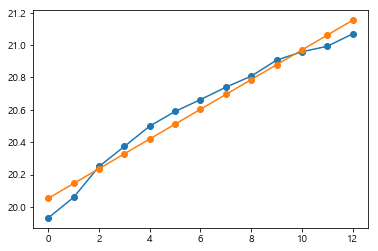

경기   자동차 임대업
r2 score 0.9650038304985731


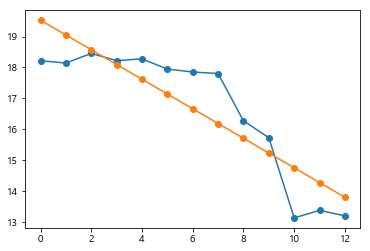

경남   버스 운송업
r2 score 0.77483438097262


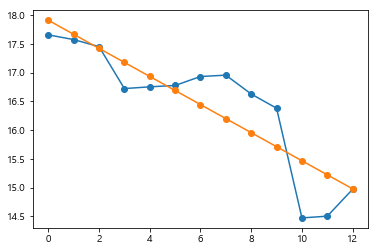

울산   버스 운송업
r2 score 0.7545349044674392


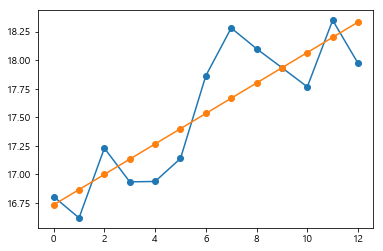

울산   전시 및 행사 대행업
r2 score 0.7370234438694949


([('경기', '자동차 임대업'),
  ('경남', '버스 운송업'),
  ('울산', '버스 운송업'),
  ('울산', '전시 및 행사 대행업')],
 [('강원', '골프장 운영업'),
  ('강원', '기타 수상오락 서비스업'),
  ('강원', '여행사업'),
  ('강원', '전시 및 행사 대행업'),
  ('강원', '호텔업'),
  ('강원', '휴양콘도 운영업'),
  ('경기', '골프장 운영업'),
  ('경기', '버스 운송업'),
  ('경기', '여행사업'),
  ('경기', '전시 및 행사 대행업'),
  ('경기', '휴양콘도 운영업'),
  ('경남', '그외 기타 스포츠시설 운영업'),
  ('경남', '기타 수상오락 서비스업'),
  ('경남', '전시 및 행사 대행업'),
  ('경남', '휴양콘도 운영업'),
  ('경북', '건강보조식품 소매업'),
  ('경북', '골프장 운영업'),
  ('경북', '그외 기타 스포츠시설 운영업'),
  ('경북', '기타 수상오락 서비스업'),
  ('경북', '휴양콘도 운영업'),
  ('광주', '골프장 운영업'),
  ('광주', '전시 및 행사 대행업'),
  ('대구', '골프장 운영업'),
  ('대구', '그외 기타 스포츠시설 운영업'),
  ('대구', '전시 및 행사 대행업'),
  ('대전', '골프장 운영업'),
  ('대전', '전시 및 행사 대행업'),
  ('부산', '그외 기타 스포츠시설 운영업'),
  ('부산', '기타 수상오락 서비스업'),
  ('서울', '골프장 운영업'),
  ('서울', '관광 민예품 및 선물용품 소매업'),
  ('세종', '건강보조식품 소매업'),
  ('세종', '골프장 운영업'),
  ('세종', '그외 기타 종합 소매업'),
  ('울산', '관광 민예품 및 선물용품 소매업'),
  ('울산', '그외 기타 스포츠시설 운영업'),
  ('울산', '여행사업'),
  ('울산', '자동차 임대업'),
  ('인천', '

In [10]:
# 변동성이 적은 그룹에서 가장 적절해보이는 R2 score 기준값: 0.7

plot_reg(over_std_under_pth, r2_rate = .7)

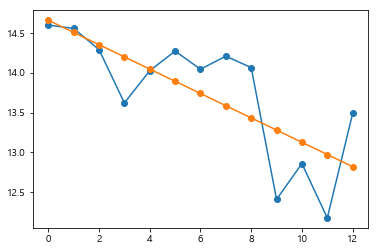

대구   기타 수상오락 서비스업
r2 score 0.5661394489407163


([('대구', '기타 수상오락 서비스업')],
 [('강원', '관광 민예품 및 선물용품 소매업'),
  ('강원', '내항 여객 운송업'),
  ('강원', '자동차 임대업'),
  ('경남', '그외 기타 분류안된 오락관련 서비스업'),
  ('경남', '여행사업'),
  ('경북', '자동차 임대업'),
  ('광주', '자동차 임대업'),
  ('대구', '자동차 임대업'),
  ('대전', '그외 기타 스포츠시설 운영업'),
  ('전남', '관광 민예품 및 선물용품 소매업'),
  ('전남', '여행사업'),
  ('전남', '자동차 임대업'),
  ('전북', '여행사업'),
  ('전북', '택시 운송업'),
  ('제주', '여행사업'),
  ('충남', '그외 기타 분류안된 오락관련 서비스업'),
  ('충북', '기타 수상오락 서비스업')])

In [11]:
# 변동성이 큰 그룹에서는 R2 score가 0.7보다 큰 게 없음
# 변동성이 작은 그룹과 기준을 다르게 줄거면 기준값은 0.5가 적당해 보임(그래봤자 1개)

plot_reg(over_std_over_pth, r2_rate = .5)